<a href="https://colab.research.google.com/github/Mohan17072003/a2/blob/main/Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow-hub
!pip install tensorflow

In [ ]:
!pip install keras

In [ ]:
import tensorflow as tf

In [ ]:
!pip install  tensorflow-hub

In [ ]:
import tensorflow_hub as hub

In [ ]:
IMAGE_SHAPE = (224, 224)

classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
])

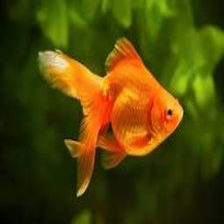

In [ ]:
from PIL import Image # Import the Image class from the PIL library

IMAGE_SHAPE = (224, 224)

# ... (rest of your code)

gold_fish = Image.open("/content/gold fish.jpg").resize(IMAGE_SHAPE) # Now Image is defined and can be used
gold_fish

In [ ]:
import numpy as np

In [ ]:
gold_fish = np.array(gold_fish)/255.0
gold_fish.shape

(224, 224, 3)

In [ ]:
gold_fish[np.newaxis, ...]

array([[[[0.01568627, 0.03529412, 0.00784314],
         [0.01960784, 0.03921569, 0.01176471],
         [0.02745098, 0.04705882, 0.01568627],
         ...,
         [0.0627451 , 0.09411765, 0.00392157],
         [0.0627451 , 0.09411765, 0.00392157],
         [0.0627451 , 0.09411765, 0.00392157]],

        [[0.01568627, 0.03529412, 0.00784314],
         [0.01960784, 0.03921569, 0.01176471],
         [0.02745098, 0.04705882, 0.01568627],
         ...,
         [0.0627451 , 0.09411765, 0.00392157],
         [0.0627451 , 0.09411765, 0.00392157],
         [0.0627451 , 0.09411765, 0.00392157]],

        [[0.01568627, 0.03529412, 0.00784314],
         [0.01960784, 0.03921569, 0.01176471],
         [0.02745098, 0.04705882, 0.01568627],
         ...,
         [0.0627451 , 0.09411765, 0.00392157],
         [0.0627451 , 0.09411765, 0.00392157],
         [0.0627451 , 0.09411765, 0.00392157]],

        ...,

        [[0.00392157, 0.01176471, 0.        ],
         [0.00392157, 0.01176471, 0.        ]

In [ ]:
result = classifier.predict(gold_fish[np.newaxis, ...])
result.shape

1/1 [==============================] - 1s 518ms/step


(1, 1001)

In [ ]:
predicted_label_index = np.argmax(result)
predicted_label_index

2

In [ ]:
import tensorflow as tf

# Download the ImageNetLabels.txt file if it doesn't exist
tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')

image_labels = []
# Open the file in read mode ("r")
with open("/content/ImageNetLabels.txt", "r") as f:
    # Read the contents of the file and split it into lines
    image_labels = f.read().splitlines()
# Display the first 5 elements of the image_labels list
image_labels[:5]

10484/10484 [==============================] - 0s 0us/step


['tench', 'goldfish', 'great white shark', 'tiger shark', 'hammerhead']

In [ ]:
image_labels[predicted_label_index]

'great white shark'

In [ ]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

228813984/228813984 [==============================] - 1s 0us/step


In [ ]:
data_dir

'./datasets/flower_photos'

In [ ]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [ ]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/sunflowers/14244410747_22691ece4a_n.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/7820523050_76c8caa025.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/5979111555_61b400c070_n.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/4235259239_21f2eb4f2e.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/2443095419_17b920d155_m.jpg')]

In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [ ]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/5799616059_0ffda02e54.jpg'),
 PosixPath('datasets/flower_photos/roses/15681454551_b6f73ce443_n.jpg'),
 PosixPath('datasets/flower_photos/roses/7683456068_02644b8382_m.jpg'),
 PosixPath('datasets/flower_photos/roses/3971662839_5cb2963b20_n.jpg'),
 PosixPath('datasets/flower_photos/roses/6473543547_4fefdbd5dc.jpg')]

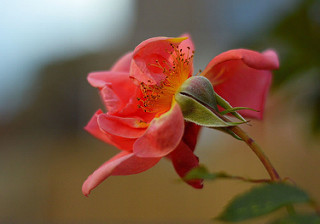

In [ ]:
from PIL import Image

# ... (rest of your code) ...

Image.open(str(roses[1])) # Now you can use Image.open()

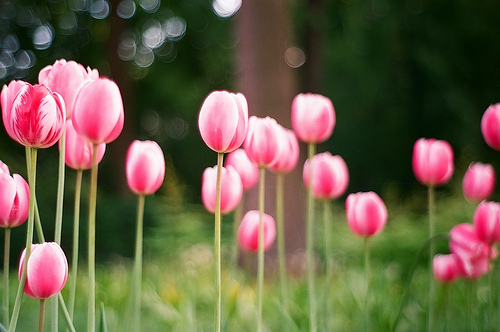

In [ ]:
from PIL import Image # Import Image from PIL

tulips = list(data_dir.glob('tulips/*'))
Image.open(str(tulips[0])) # Use Image.open() instead of PIL.Image.open()

In [ ]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

flowers_images_dict['roses'][:5]



[PosixPath('datasets/flower_photos/roses/5799616059_0ffda02e54.jpg'),
 PosixPath('datasets/flower_photos/roses/15681454551_b6f73ce443_n.jpg'),
 PosixPath('datasets/flower_photos/roses/7683456068_02644b8382_m.jpg'),
 PosixPath('datasets/flower_photos/roses/3971662839_5cb2963b20_n.jpg'),
 PosixPath('datasets/flower_photos/roses/6473543547_4fefdbd5dc.jpg')]

In [ ]:
str(flowers_images_dict['roses'][0])

'datasets/flower_photos/roses/5799616059_0ffda02e54.jpg'

In [ ]:
import cv2

In [ ]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

img.shape



(332, 500, 3)

In [ ]:
cv2.resize(img,(224,224)).shape

(224, 224, 3)

In [ ]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(224,224))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

X = np.array(X)
y = np.array(y)



In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

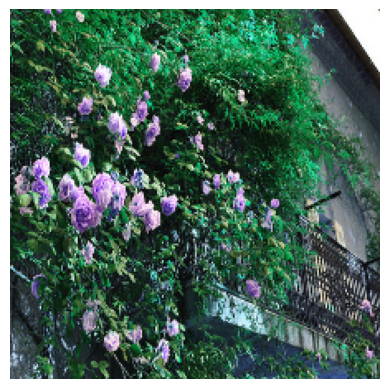

In [ ]:
import matplotlib.pyplot as plt # Import the pyplot module from matplotlib and assign it to the alias 'plt'
import cv2
import numpy as np

# ... (your existing code) ...

x0_resized = cv2.resize(X[0], IMAGE_SHAPE)
x1_resized = cv2.resize(X[1], IMAGE_SHAPE)
x2_resized = cv2.resize(X[2], IMAGE_SHAPE)

plt.axis('off') # Now plt is defined and can be used to turn off the axis
plt.imshow(X[0]) # Now plt is defined and can be used to display the image

# ... (rest of your code) ...

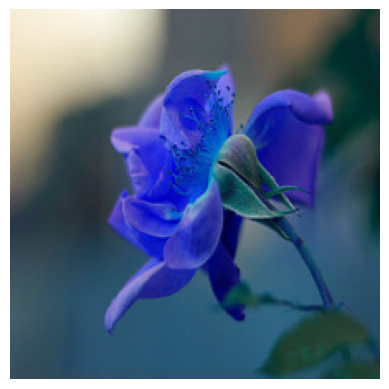

In [ ]:
plt.axis('off')
plt.imshow(X[1])

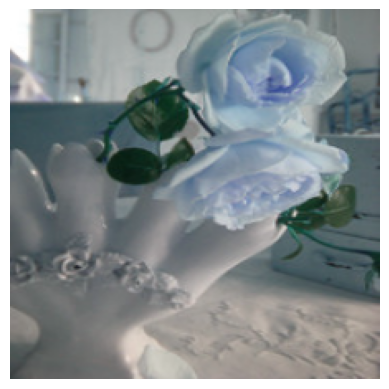

In [ ]:
plt.axis('off')
plt.imshow(X[2])

In [ ]:
predicted = classifier.predict(np.array([x0_resized, x1_resized, x2_resized]))
predicted = np.argmax(predicted, axis=1)
predicted

1/1 [==============================] - 0s 470ms/step


array([795, 722, 795])

In [ ]:
predicted = classifier.predict(np.array([x0_resized, x1_resized, x2_resized]))
predicted = np.argmax(predicted, axis=1)
predicted

1/1 [==============================] - 0s 55ms/step


array([795, 722, 795])

In [ ]:
image_labels[795]

'ski'

In [ ]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

num_of_flowers = 5

model = tf.keras.Sequential([
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(num_of_flowers)
])

model.summary()



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2264389 (8.64 MB)
Trainable params: 6405 (25.02 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [ ]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

model.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5
86/86 [==============================] - 18s 173ms/step - loss: 0.8139 - acc: 0.6995
Epoch 2/5
86/86 [==============================] - 15s 175ms/step - loss: 0.4211 - acc: 0.8528
Epoch 3/5
86/86 [==============================] - 15s 178ms/step - loss: 0.3342 - acc: 0.8928
Epoch 4/5
86/86 [==============================] - 15s 177ms/step - loss: 0.2798 - acc: 0.9132
Epoch 5/5
86/86 [==============================] - 15s 175ms/step - loss: 0.2417 - acc: 0.9222


In [ ]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 6s 179ms/step - loss: 0.3423 - acc: 0.8780


[0.342311292886734, 0.8779956698417664]

In [ ]:
 accuracy = model.evaluate(X_test_scaled,y_test)
print(f"Accuracy: {accuracy}")

29/29 [==============================] - 5s 166ms/step - loss: 0.3423 - acc: 0.8780
Accuracy: [0.342311292886734, 0.8779956698417664]


29/29 [==============================] - 5s 175ms/step
              precision    recall  f1-score   support

           0       0.82      0.89      0.86       176
           1       0.84      0.89      0.86       154
           2       0.92      0.93      0.93       226
           3       0.88      0.85      0.86       150
           4       0.92      0.82      0.87       212

    accuracy                           0.88       918
   macro avg       0.88      0.88      0.87       918
weighted avg       0.88      0.88      0.88       918



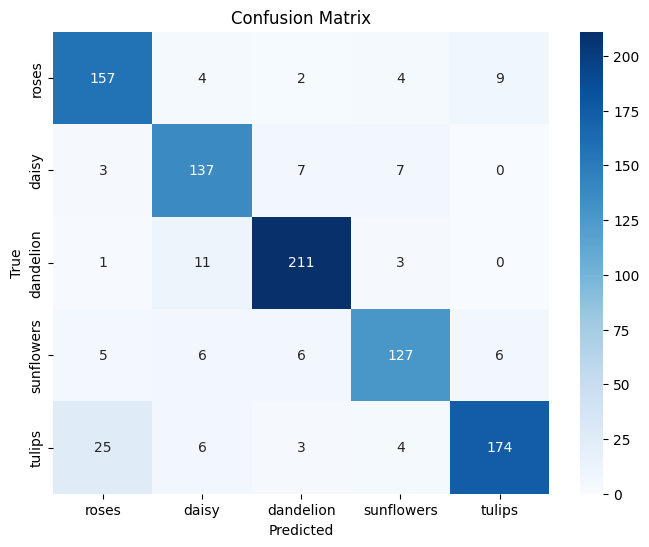

In [ ]:


# Assuming you have already trained the model and have X_test_scaled and y_test

from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)


# Classification Report
print(classification_report(y_test, y_pred_classes))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=list(flowers_labels_dict.keys()),
            yticklabels=list(flowers_labels_dict.keys()))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()